## Breast Cancer Diagnosis via Linear Regression

We will use the widely-used breast cancer data set.  This data set is described [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin).



Each sample is a collection of features that were manually recorded by a physician upon inspecting a sample of cells from fine needle aspiration. 

**The goal is to detect if the cells are benign or malignant.**

#### Loading and Visualizing the Data

We first load the packages as usual.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

Next, we load the data.  It is important to remove the missing values.

In [3]:
names = ['id','thick','size','shape','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=names,na_values='?',header=None)
df = df.dropna()
df.head(5)

,id,thick,size,shape,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


After loading the data, we can create a scatter plot of the data labeling the class values with different colors.  We will pick two of the features ("size" and "marg").  

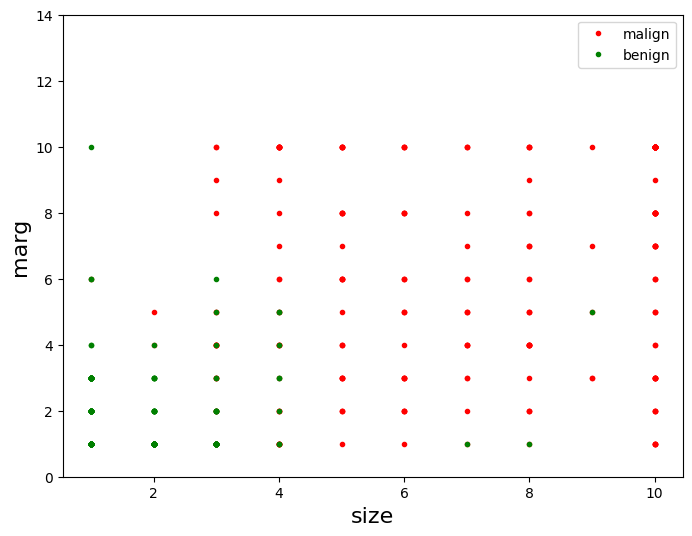

In [4]:
# Converting to a zero-one indicator.
yraw = np.array(df['class'])
BEN_VAL = 2   # value in the 'class' label for benign samples
MAL_VAL = 4   # value in the 'class' label for malignant samples
y = (yraw == MAL_VAL).astype(int)
Iben = (y==0)
Imal = (y==1)

# Get two predictors
xnames =['size','marg'] 
X = np.array(df[xnames])

# Create the scatter plot
plt.figure(figsize=(8,6))
plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Iben,0],X[Iben,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.ylim(0,14)
plt.legend(['malign','benign'],loc='upper right')


The above plot is not informative, since many of the points are on top of one another.  Thus, we cannot see the relative frequency of points.  

One way to improve the plot is to draw circles on each point whose size is proportional to the count of samples at that point.  We will re-use this code, so we define a function. 

<module 'matplotlib.pyplot' from '/home/newo/.local/lib/python3.11/site-packages/matplotlib/pyplot.py'>

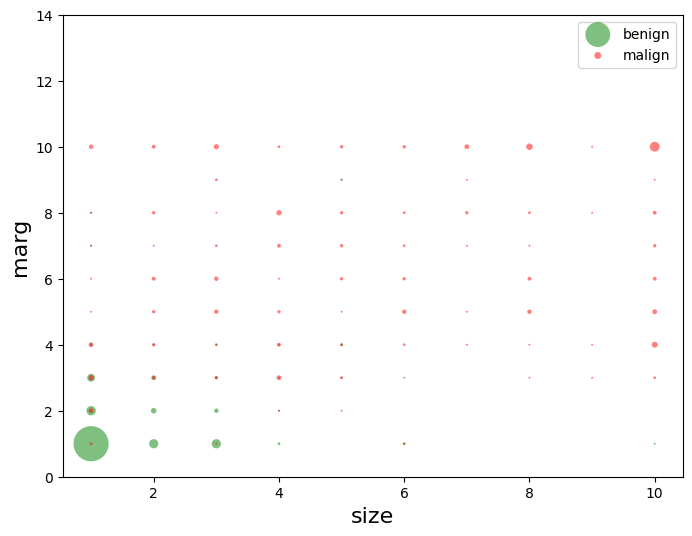

In [5]:
def plot_count(X,y):
    
    # Compute the bin edges for the 2d histogram
    x0val = np.array(list(set(X[:,0]))).astype(float)
    x1val = np.array(list(set(X[:,1]))).astype(float)
    x0, x1 = np.meshgrid(x0val,x1val)
    x0e= np.hstack((x0val,np.max(x0val)+1))
    x1e= np.hstack((x1val,np.max(x1val)+1))

    # Make a plot for each class
    yval = list(set(y))
    color = ['g','r']
    plt.figure(figsize=(8,6))
    for i in range(len(yval)):
        I = np.where(y==yval[i])[0]
        count, x0e, x1e = np.histogram2d(X[I,0],X[I,1],[x0e,x1e])
        x0, x1 = np.meshgrid(x0val,x1val)
        plt.scatter(x0.ravel(), x1.ravel(), s=2*count.ravel(),alpha=0.5,
                    c=color[i],edgecolors='none')
    plt.ylim([0,14])
    plt.legend(['benign','malign'], loc='upper right')
    plt.xlabel(xnames[0], fontsize=16)
    plt.ylabel(xnames[1], fontsize=16)
    return plt

plot_count(X,y)

#  Exercise

1) Based on the above plot, what would you think a good "classifer" using the two features could be? That is, write a rule that can classify the benign region from the malignant region.

2) Define a metric function that computes TP, FP, TN, FN, the accuracy, the sensitivity and the precision.

3) Try to improve your classifier given those metrics

4) Use sklearn logistic regression and check each metric.

In [6]:
# TODO: Implement the classifier of 1) (Note that there can be multiple classifiers)
# HINT: find the equation of the line that almost completely separates the two classes (green points from the red points in the picture above)
#       assign values greater than this line to the "malign" class otherwise to the "benign" class.  
def classifier(X, bound = 4):
    size = X[:, 0]
    marg = X[:, 1]

    y = (size + marg) >= bound

    return y.astype(int)

y_pred = classifier(X)
print(y_pred)

[0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 

In [15]:
def metrics(y, y_hat):
    # TODO: 2)
    # calculate TP, TN, FP and FN rates
    
    TP = np.sum((y + y_hat) == 2) # y = 1, yhat = 1
    TN = np.sum((y + y_hat) == 0) # y = 0, yhat = 0
    FP = np.sum((y - y_hat) == -1) # y = 0, yhat = 1
    FN = np.sum((y - y_hat) == 1) # y = 1, yhat = 0
    
    return TP, TN, FP, FN

TP, TN, FP, FN = metrics(y, y_pred)
# calculate the following metrics using TP, TN, FP, and FN
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
precision = TP / (TP + FP)
print("TP: {}, TN: {}, FP: {}, FN: {}".format(TP, TN, FP, FN))
print("Accuracy is {}, Sensitivity is {}, Precision is {}".format(accuracy, sensitivity, precision))

# TODO: 3) try to improve your classifier and measure the performance using the metrics above
print("\n")
y_pred2 = classifier(X, 6)
TP, TN, FP, FN = metrics(y, y_pred2)
# calculate the following metrics using TP, TN, FP, and FN
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
precision = TP / (TP + FP)
print("TP: {}, TN: {}, FP: {}, FN: {}".format(TP, TN, FP, FN))
print("Accuracy is {}, Sensitivity is {}, Precision is {}".format(accuracy, sensitivity, precision))

TP: 231, TN: 365, FP: 79, FN: 8
Accuracy is 0.8726207906295754, Sensitivity is 0.9665271966527197, Precision is 0.7451612903225806


TP: 214, TN: 426, FP: 18, FN: 25
Accuracy is 0.9370424597364568, Sensitivity is 0.895397489539749, Precision is 0.9224137931034483


LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [9]:
from sklearn.linear_model import LogisticRegression
# TODO: 4) use LogisticRegression of sklearn
clf = LogisticRegression(random_state=0)

# fit the logistic regression model
clf.fit(X, y)

# predict using the model
y_pred_clf = clf.predict(X)

With sklearn: 
TP: 214, TN: 429, FP: 15, FN: 25
Accuracy is 0.9414348462664714, Sensitivity is 0.895397489539749, Precision is 0.9344978165938864
-5.441891828050803
[1.26780328] [0.44704256]
[12.17309575] [-2.83597896]


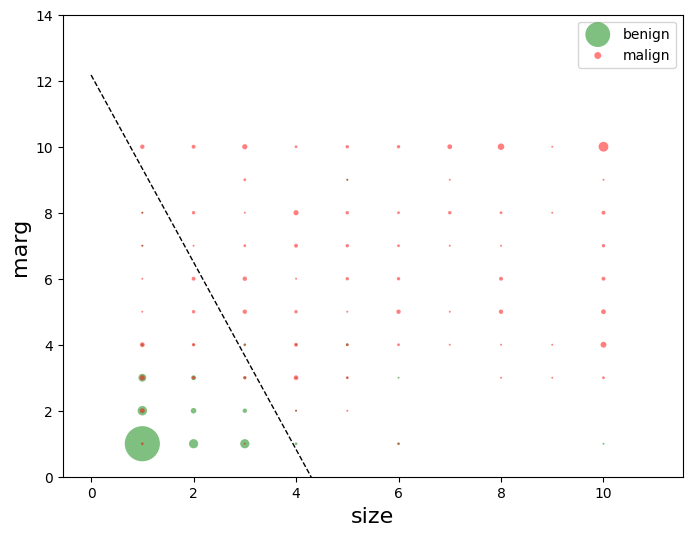

In [18]:
# Evaluate sklearn's model according to the metrics above

# TODO
TP, TN, FP, FN = metrics(y, y_pred_clf)
# calculate the following metrics using TP, TN, FP, and FN
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
precision = TP / (TP + FP)

print("With sklearn: ")
print("TP: {}, TN: {}, FP: {}, FN: {}".format(TP, TN, FP, FN))
print("Accuracy is {}, Sensitivity is {}, Precision is {}".format(accuracy, sensitivity, precision))

b = clf.intercept_[0]
print(b)
w1, w2 = clf.coef_.T
print(w1, w2)
c = -b / w2
m = -w1 / w2

print(c, m)
xd = np.array([0, 11])
yd = m * xd + c

plt = plot_count(X, y)
plt.plot(xd, yd, "k", lw = 1, ls = "--")